In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

In [20]:
def plot_offload_stats(filename = 'offload_stats.csv'):
    fig, (ax1, ax2) = plt.subplots(1,2, tight_layout=True, figsize=(10,5))
    df = pd.read_csv(filename)
    df = df.astype(int)
    df = df.reset_index().drop(columns='index')
    df[['cpu', 'cpu_total', 'cpu_intermediate', 'cpu_output', 'cpu_parameter', 'cpu_optimizer_state']].plot(ax=ax1)
    ax1.set_title('CPU Offload Stats')
    df[['gpu', 'gpu_total', 'gpu_intermediate', 'gpu_output', 'gpu_parameter', 'gpu_optimizer_state']].plot(ax=ax2)
    ax2.set_title('GPU Offload Stats')

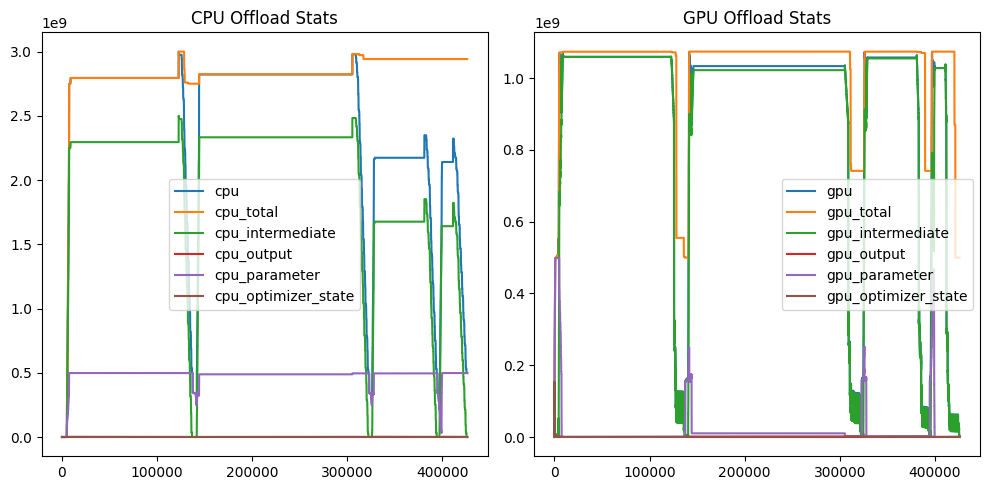

In [21]:
plot_offload_stats()

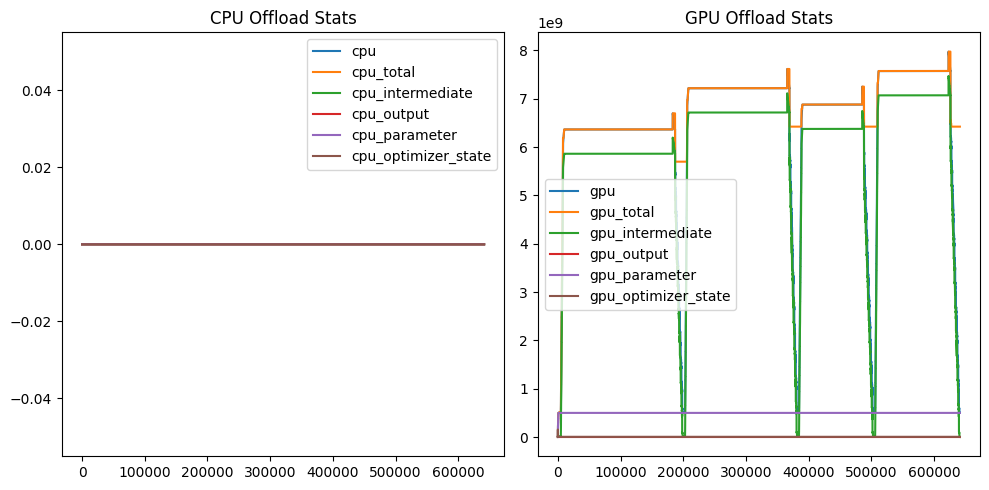

In [22]:
plot_offload_stats("offload-8-2048.csv")

In [4]:
def plot_loss(_gpu_mem, _bs, _linear_decay):
    fig, axes = plt.subplots(2, figsize=(10, 20))

    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    color_index = 0 
    for i, dir in enumerate(os.listdir('models')):
        model_dir = os.path.join('models', dir)
        if not os.path.isdir(model_dir): continue 
        try:
            try:
                model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem, linear_decay = dir.split('-')
                linear_decay = bool(int(linear_decay))
            except:
                model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem = dir.split('-')
                linear_decay = True 
            if int(gpu_mem) != _gpu_mem: continue
            if int(bs) != _bs: continue
            if linear_decay != _linear_decay: continue
            print(model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem) 
            if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
            df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
            # print(df.columns)
            df.plot.scatter(x = 'tot_time', y = 'loss', ax = axes[0], label=f'{attn}-{ff}', c=colors[color_index])
            df['loss'].plot(ax = axes[1], label=f'{attn}-{ff}', c=colors[color_index])
            color_index += 1
            color_index = color_index % len(colors)
        except:
            continue 
    plt.legend()

gpt2 124M 4 0.4 0.0 4 1024 2
gpt2 124M 4 0.0 0.4 4 1024 2
gpt2 124M 4 0.8 0.8 4 1024 2
gpt2 124M 4 0.8 0.4 4 1024 2
gpt2 124M 4 0.0 0.8 4 1024 2
gpt2 124M 4 0.4 0.4 4 1024 2
gpt2 124M 4 0.4 0.8 4 1024 2
gpt2 124M 4 0.0 0.0 4 1024 2
gpt2 124M 4 0.8 0.0 4 1024 2


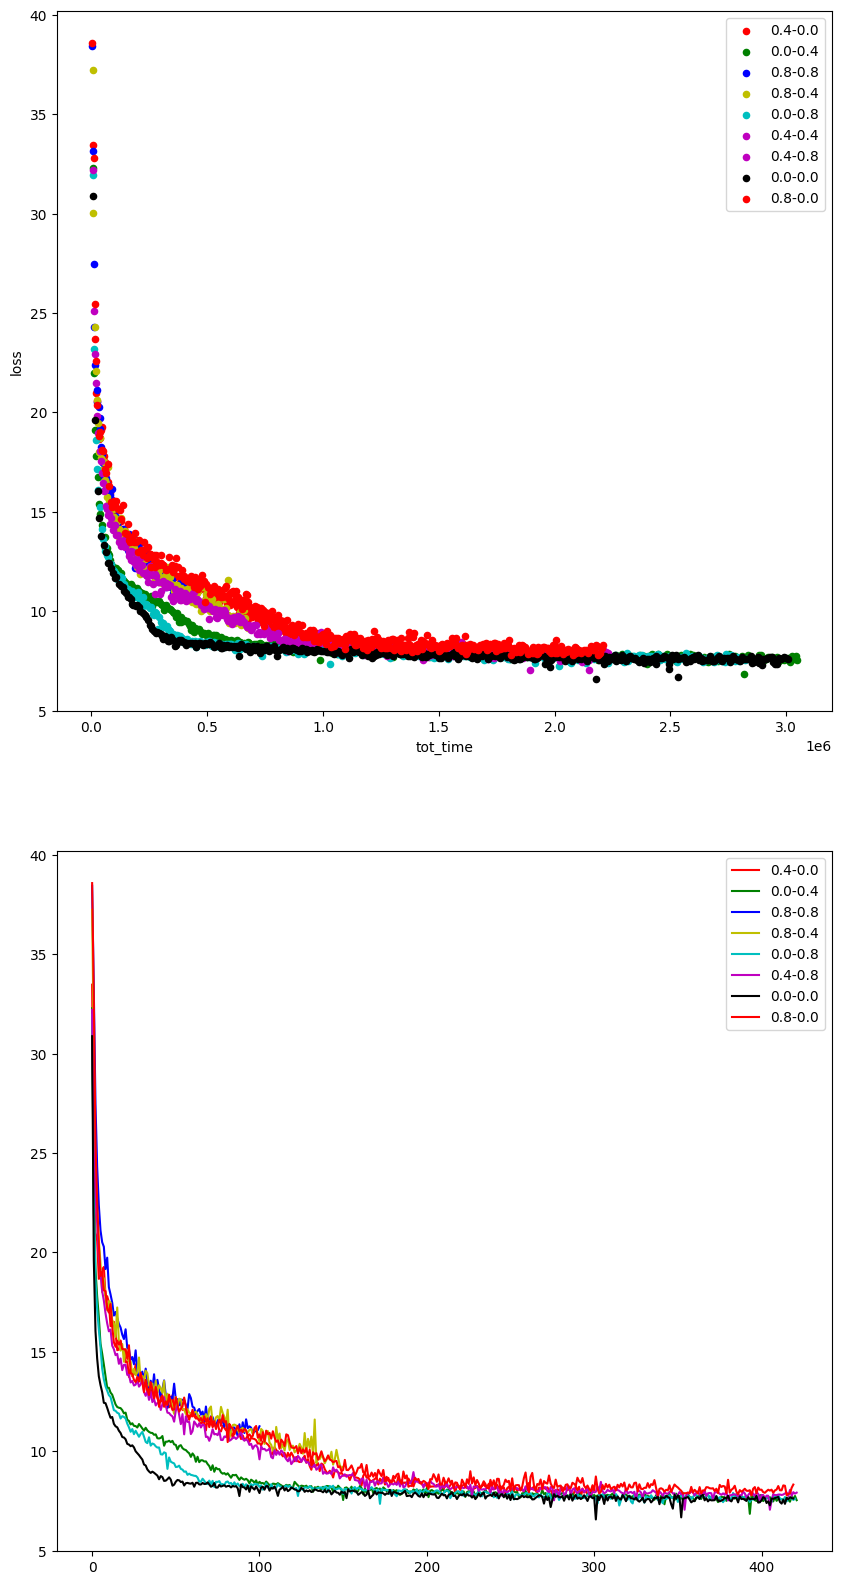

In [5]:
plot_loss(_gpu_mem=2, _bs=1024, _linear_decay=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gpt2 124M 4 0.4 0.0 4 1024 2
error with gpt2-124M
error with gpt2-124M-0.4
gpt2 124M 4 0.0 0.4 4 1024 2
error with gpt2-355M
gpt2 124M 4 0.8 0.8 4 1024 2
gpt2 124M 4 0.8 0.4 4 1024 2
gpt2 124M 4 0.0 0.8 4 1024 2
gpt2 124M 4 0.4 0.4 4 1024 2
gpt2 124M 4 0.4 0.8 4 1024 2
gpt2 124M 4 0.0 0.0 4 1024 2
gpt2 124M 4 0.8 0.0 4 1024 2
error with iwslt-envi
error with gpt2-124M-0.2
error with gpt2-1558M
error with gpt2-774M


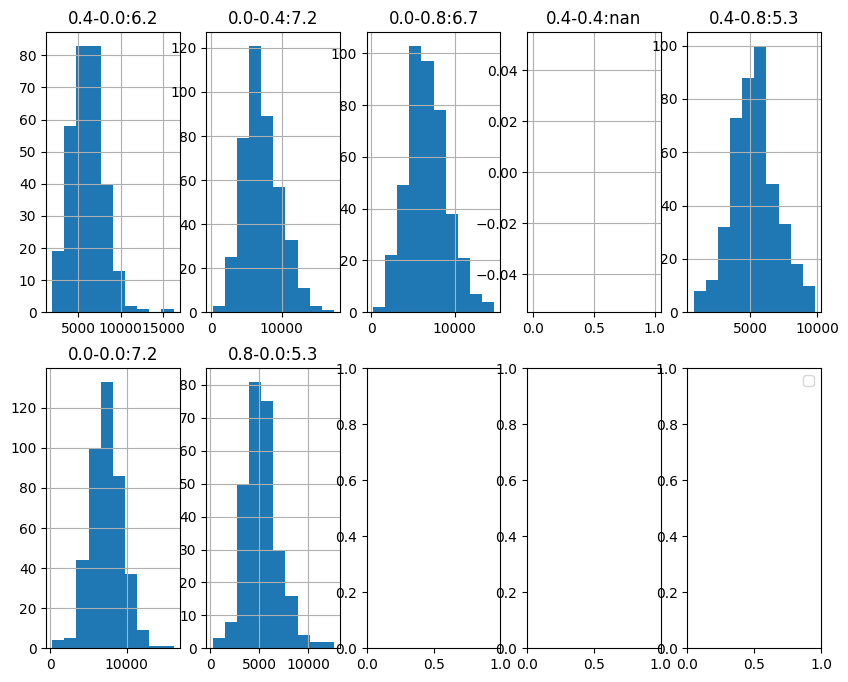

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(10, 8))
index = 0
for i, dir in enumerate(os.listdir('models')):
    model_dir = os.path.join('models', dir)
    if not os.path.isdir(model_dir): continue 
    try: 
        model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem = dir.split('-')
        print(model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem) 
        if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
        df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
        # print(df.columns)
        df['iter_time'].hist(ax=axes[index//5, index%5])
        mean = round(df['iter_time'].mean()/1000, 1)
        axes[index//5, index%5].set_title(f'{attn}-{ff}:{mean}')
        index += 1 
    except:
        print('error with', dir)
        continue 
plt.legend()

In [38]:
dfs = []
keys = []
for i, dir in enumerate(os.listdir('models')):
    model_dir = os.path.join('models', dir)
    if not os.path.isdir(model_dir): continue 
    try: 
        model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem = dir.split('-')
        print(model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem) 
        if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
        df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
        dfs.append(df.mean())
        keys.append(f'{attn}-{ff}')
    except:
        print('error with', dir)
        continue 

gpt2 124M 4 0.4 0.0 4 1024 2
error with gpt2-124M
error with gpt2-124M-0.4
gpt2 124M 4 0.0 0.4 4 1024 2
error with gpt2-355M
gpt2 124M 4 0.8 0.8 4 1024 2
gpt2 124M 4 0.8 0.4 4 1024 2
gpt2 124M 4 0.0 0.8 4 1024 2
gpt2 124M 4 0.4 0.4 4 1024 2
gpt2 124M 4 0.4 0.8 4 1024 2
gpt2 124M 4 0.0 0.0 4 1024 2
gpt2 124M 4 0.8 0.0 4 1024 2
error with iwslt-envi
error with gpt2-124M-0.2
error with gpt2-1558M
error with gpt2-774M


In [2]:
def read_csvs(dirname):
    # per_layer_time_dfs = []
    keys = []
    dfs = []
    for i, dir in enumerate(os.listdir(dirname)):
        model_dir = os.path.join(dirname, dir)
        if not os.path.isdir(model_dir): continue 
        model_name, lora_r, attn, ff, uf, bs, gpu_mem, linear_decay, truncate_layers = dir.split('-')
        df1 = pd.read_csv(os.path.join(model_dir, 'profile.engine.time.csv')).set_index('metric')['value']
        df2 = pd.read_csv(os.path.join(model_dir, 'profile.allocator.profiling.csv')).set_index('metric')['value']
        df = pd.concat([df1, df2])
        dfs.append(df)
        keys.append(f'{gpu_mem}-{truncate_layers}')
        print(model_name, lora_r, attn, ff, uf, bs, gpu_mem, linear_decay, truncate_layers)
    df = pd.concat(dfs, axis=1, keys=keys)
    return df 

In [3]:
def order(x):
    phase, name = x.split()
    layer, idx = name.split('-')
    idx = int(idx)
    if phase == 'FWD':
        return idx
    else: 
        return 100-idx

In [65]:
def plot_layer_times_dev(df_, key, ax):
    attn_times = df_[df_.index.str.contains(key)]
    attn_times = attn_times.reindex(sorted(attn_times.index, key=order)).dropna()
    
    attn_times.plot.bar(ax=ax)
    ax.set_title(key)
def plot_layer_times(df, truncate):
    df_all = df[[f'1-{truncate}', f'2-{truncate}', f'4-{truncate}']]
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), tight_layout=True)
    plot_layer_times_dev(df_all, 'Attn', ax1)
    plot_layer_times_dev(df_all, 'FF', ax2)
    fig.savefig(f'layer_times-{truncate}.png')

In [4]:
df = read_csvs('models/truncate')
plot_layer_times(df, '12')

FileNotFoundError: [Errno 2] No such file or directory: 'models/truncate/gpt2_124M-4-0.0-0.0-1-1024-12.0-0-8/profile.engine.time.csv'

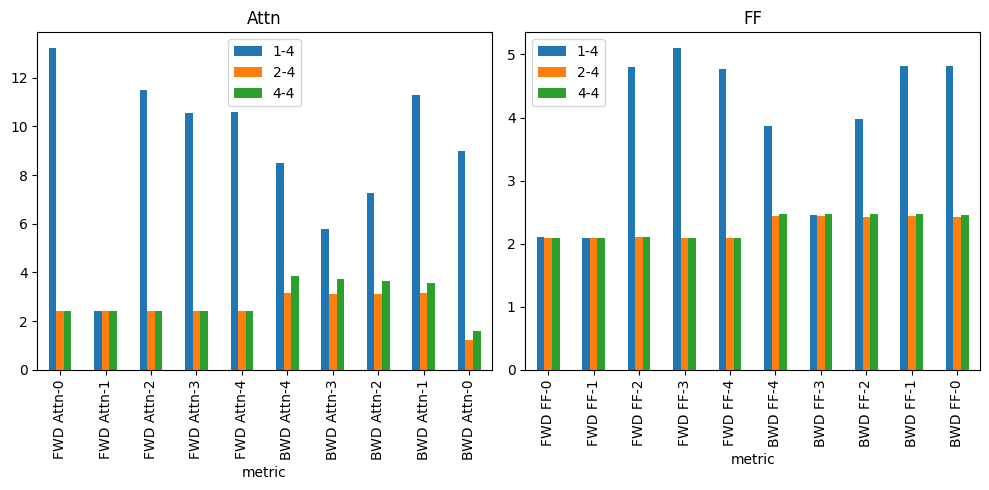

In [67]:
plot_layer_times('4')

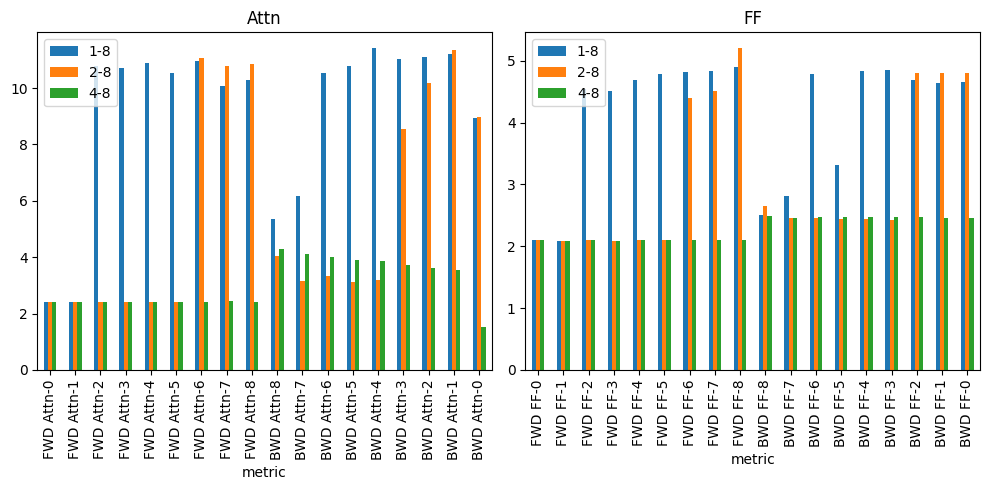

In [66]:
plot_layer_times('8')

In [69]:
def plot_loss(dirname, metric = 'loss', interested = ['lora', 'attn', 'ff', 'uf', 'bs', 'gpu_mem', 'linear_decay', 'truncate_layers'], plot_mean = False):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    color_index = 0 
    fig.suptitle(', '.join(interested))
    dfs = []
    keys = []
    for i, dir in enumerate(os.listdir(dirname)):
        model_dir = os.path.join(dirname, dir)
        if not os.path.isdir(model_dir): continue 
        model_name, lora_r, attn, ff, uf, bs, gpu_mem, linear_decay, truncate_layers = dir.split('-')[:9]
        if truncate_layers == '-': truncate_layers = '12'
        if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
        df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
        
        label = []
        if 'lora' in interested: 
            label.append(lora_r)
        if 'attn' in interested:
            label.append(attn)
        if 'ff' in interested:
            label.append(ff)
        if 'uf' in interested:
            label.append(uf)
        if 'bs' in interested:
            label.append(bs)
        if 'gpu_mem' in interested:
            label.append(gpu_mem)
        if 'linear_decay' in interested:
            label.append(linear_decay)
        if 'truncate_layers' in interested:
            label.append(truncate_layers)
        label = '-'.join(label)
        if not plot_mean:
            print(df.columns)
            df.plot(x = 'tot_time', y = metric, ax = ax0, label=label, c=colors[color_index])
            df[metric].plot(ax = ax1, label=label, c=colors[color_index])
            color_index += 1
            color_index = color_index % len(colors)
        else:
            dfs.append(df.mean())
            keys.append(label)
    if plot_mean:
        dfs = [(df, key) for df, key in zip(dfs, keys)]
        sorted(dfs, key=lambda x: x[1])
        dfs, keys = zip(*dfs)
        df = pd.concat(dfs, axis=1, keys=keys)
        print(df.columns)
        first_col = df.columns[0]
        df = df.div(df[first_col], axis=0)
        print(df)
        df.plot.bar(ax=ax0)
        # df.loc[metric].plot.bar(ax=ax0)
        # ax0.set_ylabel(metric)
        # ax0.set_xlabel('mean')
    else: 
        ax0.set_ylabel(metric)
        ax1.set_ylabel(metric)
        ax0.set_xlabel('Time(ms)')
        ax1.set_xlabel('#Data')
    tag = dirname.split('/')[-1] + '-' + '_'.join(interested)
    fig.savefig(f'loss-{tag}.png')
    plt.legend()

Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')


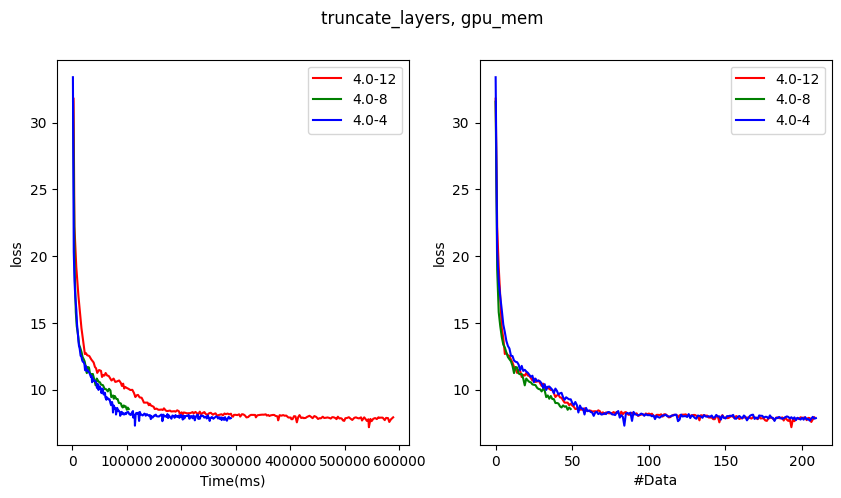

In [71]:
plot_loss('models/truncate_4G', 'loss', ['truncate_layers', 'gpu_mem'])

Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')


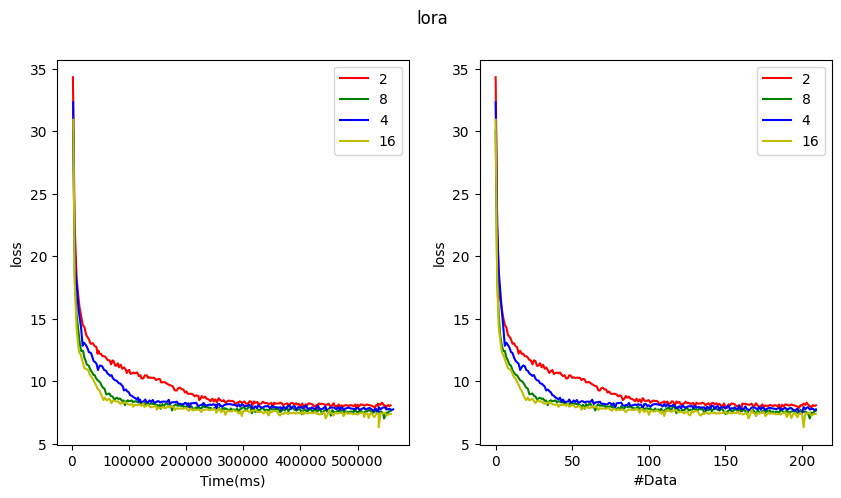

In [72]:
plot_loss('models/test-lora', 'loss', ['lora'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['2', '8', '4', '16'], dtype='object')
                  2         8         4        16
tot_time        1.0  0.996504  0.999781  1.001775
tot_exec_time   1.0  0.996354  0.998466  1.001527
iter_time       1.0  0.999477  1.008169  1.000576
iter_exec_time  1.0  1.007748  1.005845  0.992882
loss            1.0  0.878075  0.927290  0.853494
max_gpu_usage   1.0  0.999191  0.995327  0.999542
max_cpu_usage   NaN       NaN       NaN       NaN
n_attn          1.0  1.000000  1.000000  1.000000
n_ff            1.0  1.000000  1.000000  1.000000
n_layer         1.0  1.000000  1.000000  1.000000


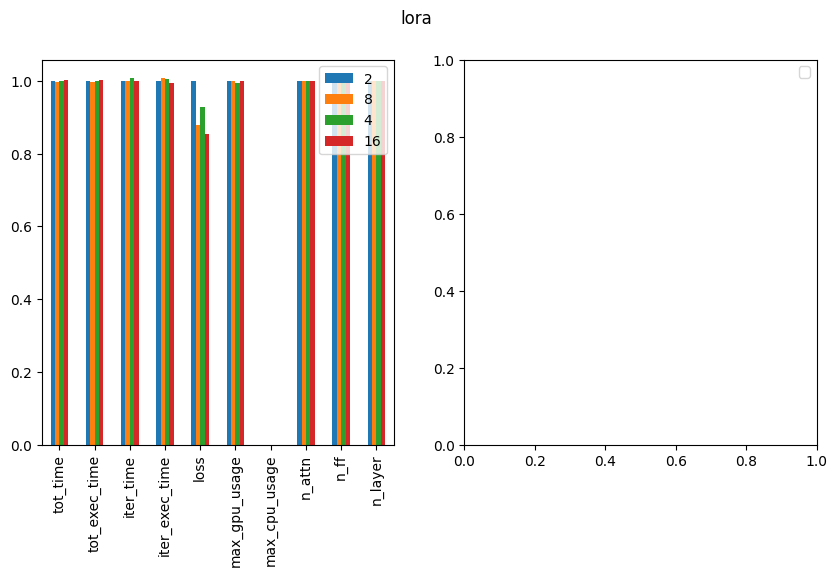

In [67]:
plot_loss('models/test-lora', 'max_gpu_usage', ['lora'], True)

Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')


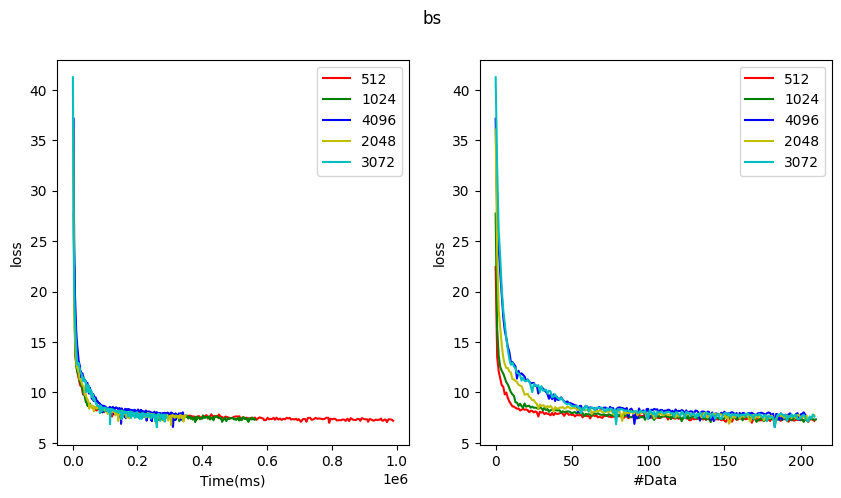

In [73]:
plot_loss('models/test-bs', 'loss', ['bs'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['512', '1024', '4096', '2048', '3072'], dtype='object')
                512      1024      4096      2048      3072
tot_time        1.0  0.585186  0.351721  0.363100  0.312433
tot_exec_time   1.0  0.594901  0.370616  0.374996  0.324862
iter_time       1.0  0.566659  0.355258  0.352804  0.291873
iter_exec_time  1.0  1.295089  2.891114  1.733426  2.169055
loss            1.0  1.031690  1.177027  1.095604  1.165387
max_gpu_usage   1.0  1.279816  3.171552  2.162401  2.895863
max_cpu_usage   NaN       NaN       inf       inf       inf
n_attn          1.0  0.462558  0.104469  0.211105  0.136998
n_ff            1.0  0.462558  0.104469  0.211105  0.136998
n_layer         1.0  0.462558  0.104469  0.211105  0.136998


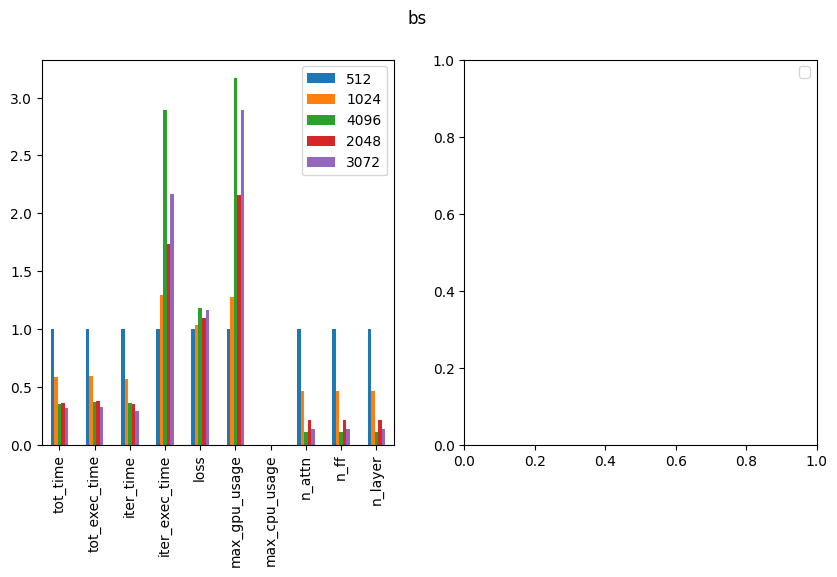

In [68]:
plot_loss('models/test-bs', 'max_gpu_usage', ['bs'], True)

Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')


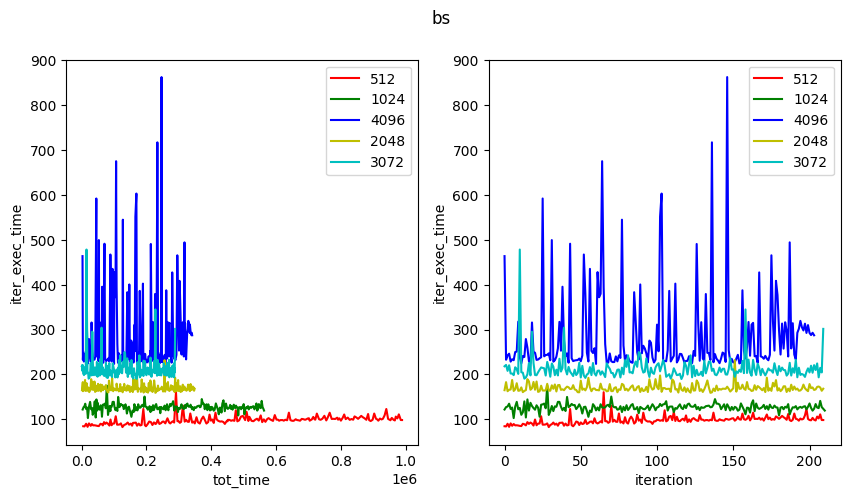

In [39]:
plot_loss('models/test-bs', 'iter_exec_time', ['bs'])

Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')


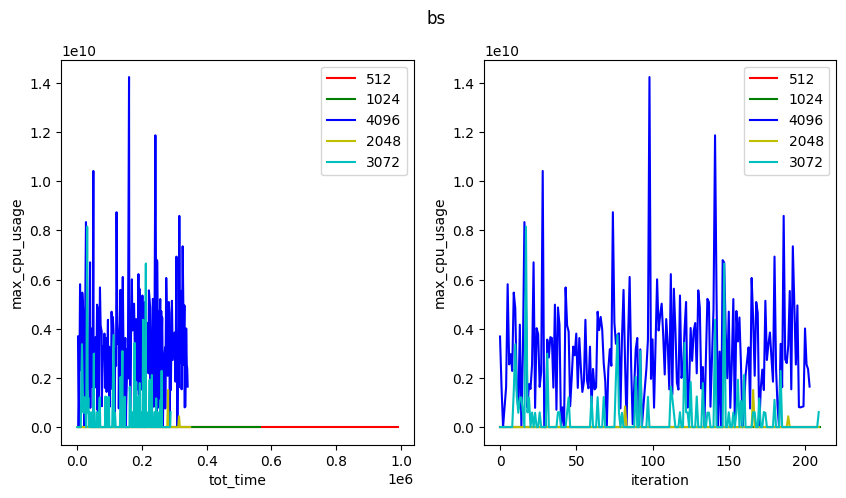

In [38]:
plot_loss('models/test-bs', 'max_cpu_usage', ['bs'])

Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')
Index(['tot_time', 'tot_exec_time', 'iter_time', 'iter_exec_time', 'loss',
       'max_gpu_usage', 'max_cpu_usage', 'n_attn', 'n_ff', 'n_layer'],
      dtype='object')


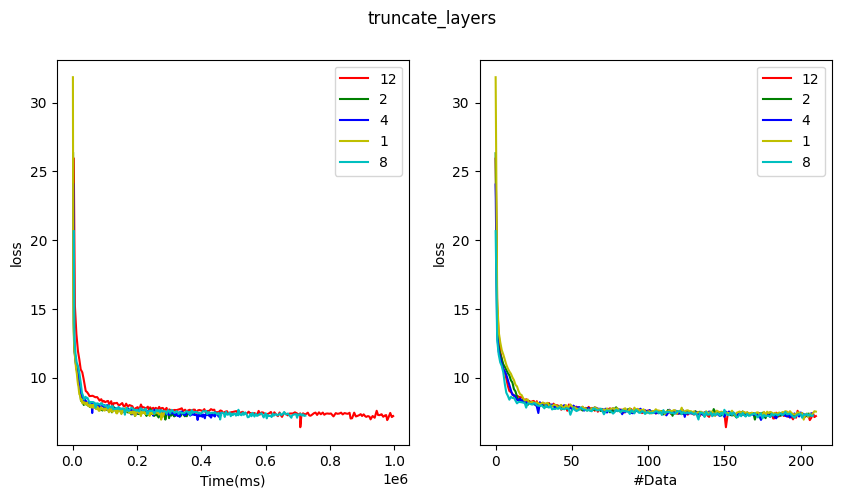

In [75]:
plot_loss('models/truncate', 'loss', interested=['truncate_layers'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['12', '2', '4', '1', '8'], dtype='object')
                 12         2         4         1         8
tot_time        1.0  0.356686  0.473547  0.292728  0.728721
tot_exec_time   1.0  0.352415  0.471967  0.289726  0.733548
iter_time       1.0  0.363186  0.467233  0.288335  0.733104
iter_exec_time  1.0  0.354811  0.458817  0.282583  0.728243
loss            1.0  1.003618  0.997398  1.021929  0.984862
max_gpu_usage   1.0  0.435189  0.563826  0.373675  0.809562
max_cpu_usage   NaN       NaN       NaN       NaN       NaN
n_attn          1.0  0.253606  0.420654  0.166667  0.757177
n_ff            1.0  0.253606  0.420654  0.166667  0.757177
n_layer         1.0  1.014423  1.009569  1.000000  1.009569


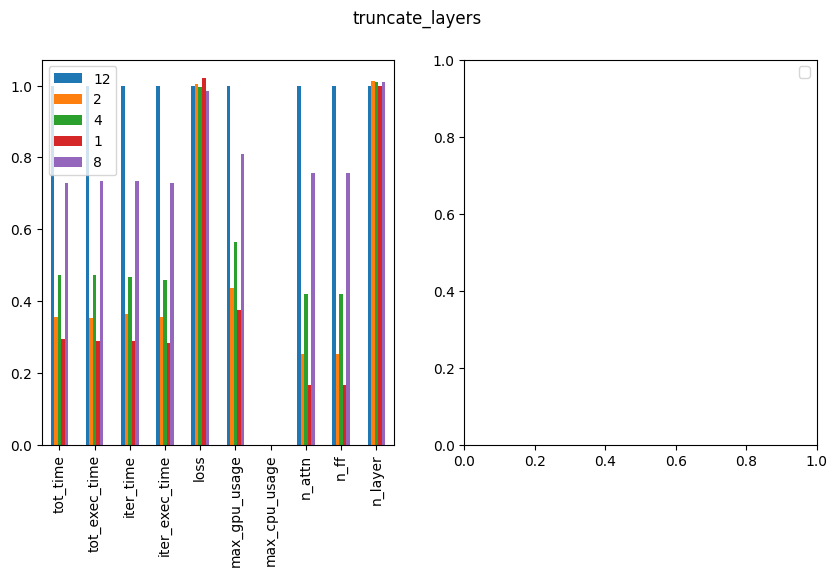

In [76]:
plot_loss('models/truncate', 'loss', interested=['truncate_layers'], plot_mean=True)

1. stochastic depth's influence to communication;
2. better scheduling of stochastic depth;

Settings: 
1. Pre-training: Stochastic depth; No resource; 
2. Task-igonistic finetuning; 
3. Task-specific fintuning: Pruning, fine-tuning;

In [6]:
def plot_hist(dirname, metric):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    index = 0
    for i, dir in enumerate(os.listdir(dirname)):
        model_dir = os.path.join(dirname, dir)
        if not os.path.isdir(model_dir): continue 
        print(dir)
        model_name, lora_r, attn, ff, uf, bs, gpu_mem, linear_decay, truncate_layers = dir.split('-')
        if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
        df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
        # print(df.columns)
        df[metric].hist(ax=axes[index])
        mean = round(df[metric].mean()/1000, 1)
        axes[index%3].set_title(f'{truncate_layers}-{gpu_mem}:{mean}')
        index += 1 

    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gpt2_124M-4-0.0-0.0-1-1024-12.0-0-8
gpt2_124M-4-0.0-0.0-1-1024-12.0-0-4
gpt2_124M-4-0.0-0.0-1-1024-12.0-0-12


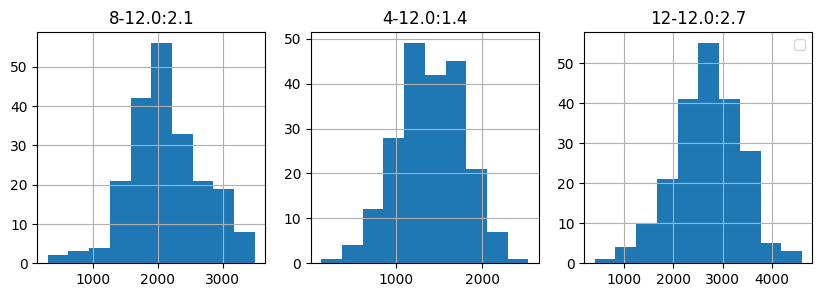

In [40]:
plot_hist('models/truncate', 'iter_time')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gpt2_124M-4-0.0-0.0-1-1024-12.0-0-8
gpt2_124M-4-0.0-0.0-1-1024-12.0-0-4
gpt2_124M-4-0.0-0.0-1-1024-12.0-0-12


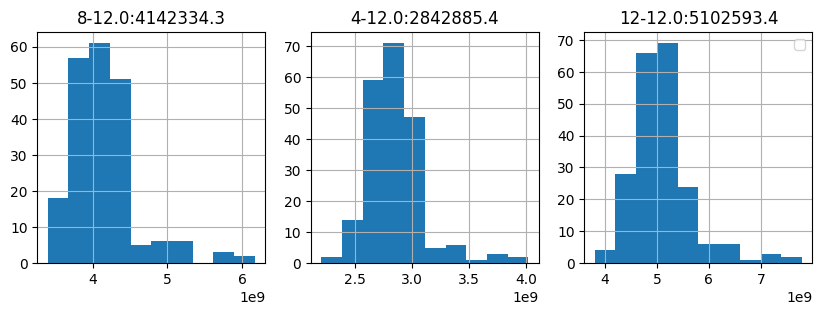

In [41]:
plot_hist('models/truncate', 'max_gpu_usage')

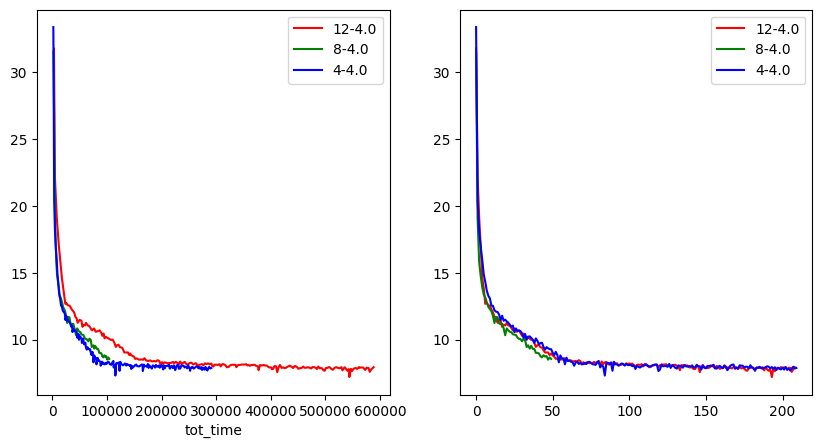

In [4]:
plot_loss('models/truncate_4G')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gpt2_124M-4-0.0-0.0-1-1024-4.0-0-12
gpt2_124M-4-0.0-0.0-1-1024-4.0-0-8
gpt2_124M-4-0.0-0.0-1-1024-4.0-0-4


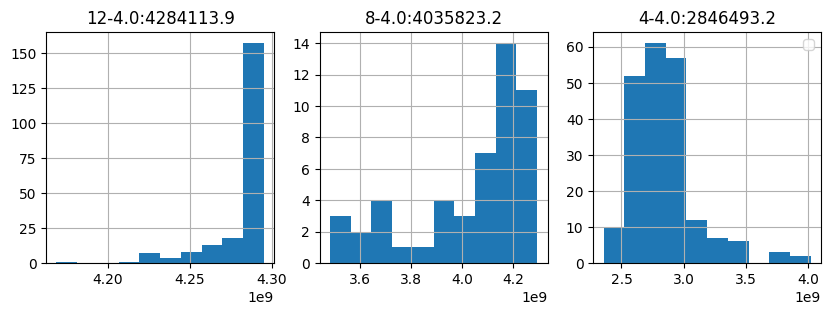

In [7]:
plot_hist('models/truncate_4G', 'max_gpu_usage')

In [25]:
plot_hist('models/truncate_4G', 'max_cpu_usage')

NameError: name 'plot_hist' is not defined